In [2]:
! pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anderas/car-consume")

print("Path to dataset files:", path)

100%|██████████| 225k/225k [00:00<00:00, 680kB/s]

Extracting files...
Path to dataset files: C:\Users\shijin kunju\.cache\kagglehub\datasets\anderas\car-consume\versions\5


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style= 'whitegrid')
# Load the dataset
file_path = r"C:\Users\shijin kunju\.cache\kagglehub\datasets\anderas\car-consume\versions\5\measurements.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [17]:
#convert to numeric
df['distance'] = pd.to_numeric(df['distance'].str.replace(',', '.'), errors='coerce')
df['temp_inside'] = pd.to_numeric(df['temp_inside'].str.replace(',', '.'), errors = 'coerce')
df['consume'] = pd.to_numeric(df['consume'].str.replace(',', '.'), errors = 'coerce')

In [18]:
# Replace comma with dot only if values are strings
for col in ['distance', 'temp_inside', 'consume']:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the conversion
df[['distance', 'temp_inside', 'consume']].dtypes

distance       float64
temp_inside    float64
consume        float64
dtype: object

In [20]:
df = df.dropna(subset= ['distance', 'consume', 'temp_inside', 'temp_outside'])

In [21]:
print("Remaining rows:", len(df))
df.head()

Remaining rows: 376


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


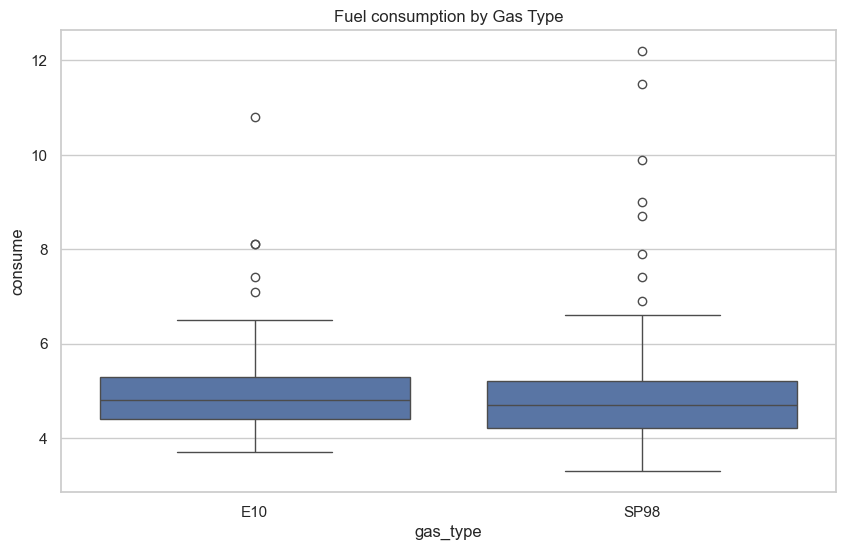

In [22]:
#exploratory data analysis - distribution of cinsumption by gas 
plt.figure(figsize=(10,6))
sns.boxplot(x ='gas_type', y = 'consume', data =df)
plt.title('Fuel consumption by Gas Type')
plt.show()

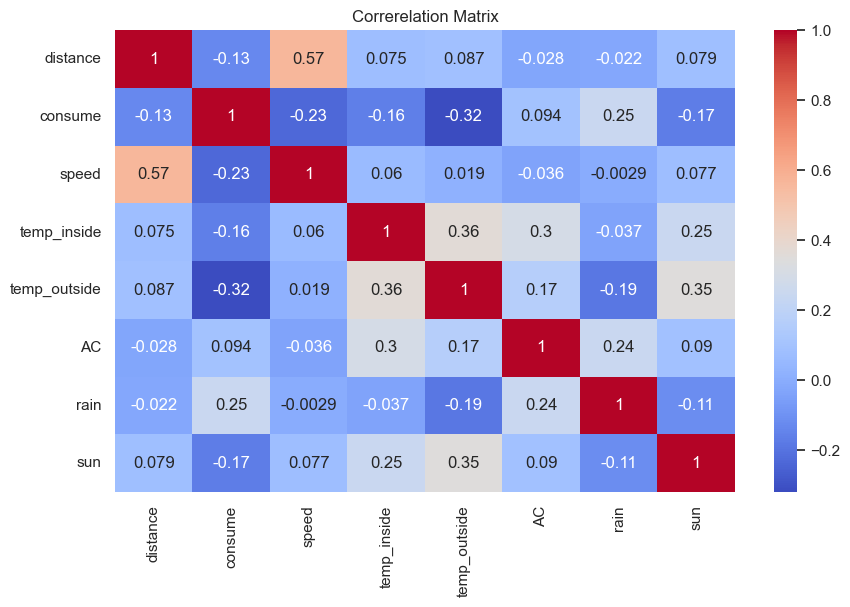

In [23]:
#correrelation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.title('Correrelation Matrix')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
features = ['distance', 'speed', 'temp_inside', 'temp_outside']
X = df[features]
y = df['consume']

In [29]:
#spli data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
#predict
y_pred = model.predict(X_test)

In [33]:
#evaluate
print("R^2 Score:" , r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))

R^2 Score: 0.18945453851639982
RMSE: 0.8984743339648862


In [34]:
#scraps current fuel prices from Globalpetrolprices 
import requests 
from bs4 import BeautifulSoup

In [41]:
url = "https://www.globalpetrolprices.com/Spain/gasoline_prices/"

In [42]:
response= requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [43]:
#find the fuel price table
table =soup.find("table",{"class": "table table-striped table-bordered"})

In [45]:
#convert table to dataframe
rows = table.find_all('tr')
data = []

for row in rows[1:]:
    cols = row.find_all('td')
    country = cols[0].text.strip()
    price = cols[1].text.strip().replace(" USD/liter", "")
    data.append([country, float(price)])

fuel_df = pd.DataFrame(data, columns=["Country", "Price_per_Liter_USD"])

# Display for a few countries
fuel_df[fuel_df["Country"].isin(["Spain"])]

AttributeError: 'NoneType' object has no attribute 'find_all'

In [46]:

# Simulated fuel prices (USD per liter)
fuel_prices = {
    "E10": 1.48,
    "SP98": 1.68
}

# Add to your dataframe
df['fuel_price_usd'] = df['gas_type'].map(fuel_prices)
df['cost_per_trip_usd'] = (df['distance'] * df['consume'] / 100) * df['fuel_price_usd']

# Show enriched dataset
df[['gas_type', 'distance', 'consume', 'fuel_price_usd', 'cost_per_trip_usd']].head()

,gas_type,distance,consume,fuel_price_usd,cost_per_trip_usd
0,E10,28.0,5.0,1.48,2.072000
1,E10,12.0,4.2,1.48,0.745920
2,E10,11.2,5.5,1.48,0.911680
3,E10,12.9,3.9,1.48,0.744588
4,E10,18.5,4.5,1.48,1.232100


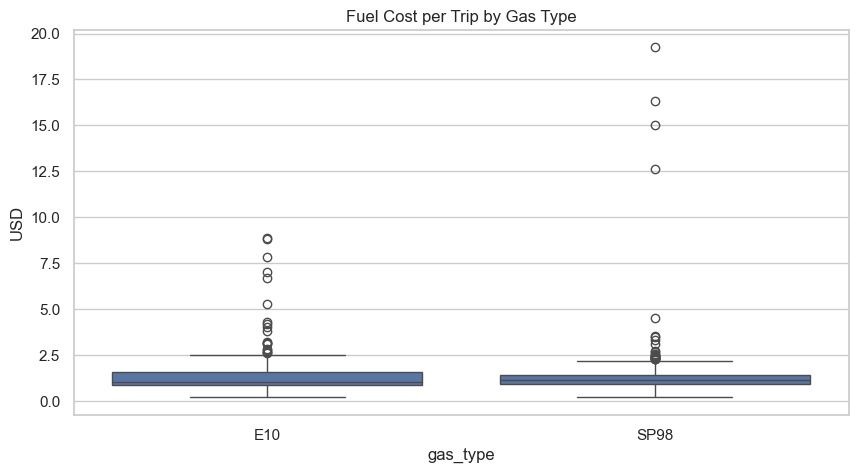

In [47]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='gas_type', y='cost_per_trip_usd', data=df)
plt.title("Fuel Cost per Trip by Gas Type")
plt.ylabel("USD")
plt.show()

In [48]:
# Define features and new target
features = ['distance', 'speed', 'temp_inside', 'temp_outside']
X = df[features]
y = df['cost_per_trip_usd']  # NEW target


In [49]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
# Predict
y_pred = model.predict(X_test)


In [52]:
# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [54]:
print("Model to Predict Fuel Cost per Trip")
print("R² Score:", round(r2, 2))
print("RMSE:", round(rmse, 4), "USD")

Model to Predict Fuel Cost per Trip
R² Score: 0.98
RMSE: 0.2427 USD


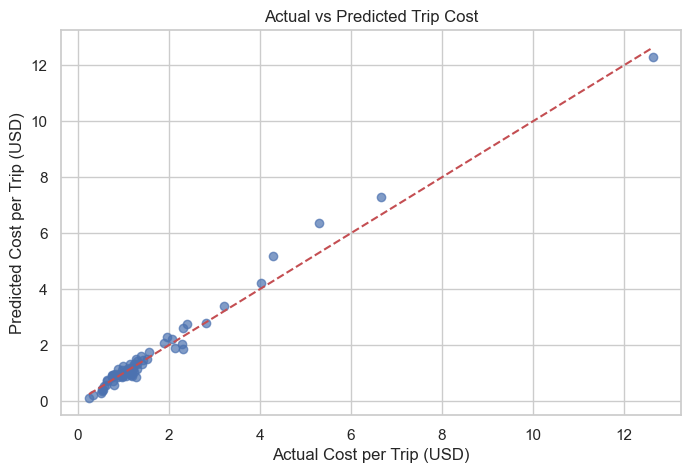

In [55]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Cost per Trip (USD)")
plt.ylabel("Predicted Cost per Trip (USD)")
plt.title("Actual vs Predicted Trip Cost")
plt.grid(True)
plt.show()